### TADA - YCSB BB Workload
- Data Prepare (metric)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_BB/results/external_metrics.csv")

In [2]:
A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_BB/results/external_metrics.csv")

metrics = A_metrics.drop(['Unnamed: 0'], axis = 1)

metrics = metrics.replace([np.inf],9999999)


metrics

,tps,latency
0,2.255553,11648922.0
1,2.033328,10445860.0
2,1.977777,8698988.0
3,2.155554,10012336.0
4,2.199993,8223487.0
...,...,...
995,9019.803617,687.0
996,2.561101,7797150.0
997,8938.196096,744.0
998,2.055553,7965245.0


- Data Prepare (config)

In [3]:
import random
import glob
import os
import sys
import pandas as pd

knob_list = glob.glob("/home/sein/mk_config/ycsb_BB/configs/my_*.cnf")


In [4]:
cnt = 0

for xx in range(len(knob_list)):
    path = "/home/sein/mk_config/ycsb_BB/configs/my_{}.cnf".format(xx)
    # knob_list = glob.glob("/home/sein/2023_EDBT/KCC_tpcc_dataset/my_*.cnf")
    a_all = pd.read_csv(path, sep="=", names=['Sample', 'value'], header=2)
    a_all = a_all.set_index("Sample")
    cur_all_df = a_all.T
    
    if cnt == 0:
        A_config = cur_all_df
    else :
        A_config = pd.concat([A_config, cur_all_df], axis=0)
    cnt += 1
A_config = A_config.reset_index()
A_config = A_config.drop(["index"],axis=1)
A_config = A_config.drop(A_config.columns[[0,1]], axis=1)


A_config

Sample,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,0,18000,9764864,410000,936000,1,1818624,557842432,2,22,...,322304,960000,28000,4000,59,3072,285212672,122880,83968,0
1,0,40000,3375104,360000,230000,1,6537216,134217728,3,19,...,426752,420000,46800,10000,29,5120,197132288,32768,112640,1
2,0,55000,8912896,45000,14000,1,8912896,146800640,1,20,...,80128,740000,10400,4000,63,12032,998244352,94208,16384,0
3,0,13000,8830976,220000,303000,1,7864320,801112064,0,1,...,283648,270000,44400,2000,7,5120,113246208,65536,116736,0
4,1,21000,3178496,845000,286000,1,8830976,150994944,5,3,...,210176,960000,56800,4000,35,2560,679477248,24576,88064,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,6000,3670016,150000,758000,1,9093120,1069547520,2,24,...,106496,750000,31600,8000,61,4608,67108864,8192,4096,0
996,0,9000,8224768,320000,746000,0,2818048,864026624,0,25,...,47360,650000,70000,4000,13,11008,29360128,53248,73728,0
997,0,52000,4898816,805000,256000,1,9650176,830472192,4,5,...,129536,280000,73200,10000,5,4864,935329792,24576,65536,1
998,1,40000,3194880,540000,213000,1,9404416,645922816,5,19,...,219648,240000,27600,4000,59,6912,922746880,106496,47104,1


- all_samples = config + metrics (1000 x 140) => AutoEncoder's input : Config + Metrics

In [5]:
all_samples = pd.concat([A_config,metrics], axis=1)

all_samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,0,18000,9764864,410000,936000,1,1818624,557842432,2,22,...,28000,4000,59,3072,285212672,122880,83968,0,2.255553,11648922.0
1,0,40000,3375104,360000,230000,1,6537216,134217728,3,19,...,46800,10000,29,5120,197132288,32768,112640,1,2.033328,10445860.0
2,0,55000,8912896,45000,14000,1,8912896,146800640,1,20,...,10400,4000,63,12032,998244352,94208,16384,0,1.977777,8698988.0
3,0,13000,8830976,220000,303000,1,7864320,801112064,0,1,...,44400,2000,7,5120,113246208,65536,116736,0,2.155554,10012336.0
4,1,21000,3178496,845000,286000,1,8830976,150994944,5,3,...,56800,4000,35,2560,679477248,24576,88064,1,2.199993,8223487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,6000,3670016,150000,758000,1,9093120,1069547520,2,24,...,31600,8000,61,4608,67108864,8192,4096,0,9019.803617,687.0
996,0,9000,8224768,320000,746000,0,2818048,864026624,0,25,...,70000,4000,13,11008,29360128,53248,73728,0,2.561101,7797150.0
997,0,52000,4898816,805000,256000,1,9650176,830472192,4,5,...,73200,10000,5,4864,935329792,24576,65536,1,8938.196096,744.0
998,1,40000,3194880,540000,213000,1,9404416,645922816,5,19,...,27600,4000,59,6912,922746880,106496,47104,1,2.055553,7965245.0


In [6]:
discrete_columns = [all_samples.columns[0], all_samples.columns[5],all_samples.columns[10],all_samples.columns[13],
                    all_samples.columns[17],all_samples.columns[24],all_samples.columns[30],all_samples.columns[31],
                    all_samples.columns[32],all_samples.columns[34],all_samples.columns[36],all_samples.columns[37],
                    all_samples.columns[58],all_samples.columns[60],all_samples.columns[64],all_samples.columns[68],
                    all_samples.columns[72],all_samples.columns[73],all_samples.columns[74],all_samples.columns[75],
                    all_samples.columns[77],all_samples.columns[80],all_samples.columns[82],all_samples.columns[83],
                    all_samples.columns[90],all_samples.columns[91],all_samples.columns[92],all_samples.columns[93],
                    all_samples.columns[118],all_samples.columns[123],all_samples.columns[124],all_samples.columns[125],
                    all_samples.columns[126]]

### continuous 열 정리
all_columns = all_samples.columns
continuous_columns = all_columns.drop(discrete_columns)

In [7]:
for i in range(len(discrete_columns)):
    a = discrete_columns[i]
    all_samples = all_samples.astype({a:'int'})

In [8]:
for i in range(len(continuous_columns)):
    a = continuous_columns[i]
    all_samples = all_samples.astype({a:'float'})

### config - metric prediction (with raw data #1000)

### Prediction Model

In [ ]:
### TabNet
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import torch
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

X_all = np.array(A_config)
Y_all = np.array(metrics)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)

y_train_tps = y_train[:,0][:, np.newaxis]
y_train_latency = y_train[:,1][:, np.newaxis]
y_test_tps = y_test[:,0][:, np.newaxis]
y_test_latency = y_test[:,1][:, np.newaxis]
 
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler_tps  = StandardScaler().fit(y_train_tps)
Y_scaler_latecy = StandardScaler().fit(y_train_latency)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)

scaled_y_train_tps = Y_scaler_tps.transform(y_train_tps)
scaled_y_train_latecy = Y_scaler_latecy.transform(y_train_latency)

scaled_y_test_tps = Y_scaler_tps.transform(y_test_tps)
scaled_y_test_latecy = Y_scaler_latecy.transform(y_test_latency)

# scaled_y_train = np.concatenate([scaled_y_train_latecy, scaled_y_train_tps], 1)
# scaled_y_test = np.concatenate([scaled_y_test_latecy, scaled_y_test_tps], 1)

scaled_y_train = np.concatenate([scaled_y_train_tps, scaled_y_train_latecy], 1)
scaled_y_test = np.concatenate([scaled_y_test_tps, scaled_y_test_latecy], 1)

# Tabnet 모델 생성
regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) ### Basic

# 모델 학습
regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train,
              eval_set=[(scaled_X_test, scaled_y_test)],
              patience=200, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['mse'])


predictions = regressor.predict(scaled_X_test)

test_score = mean_squared_error(y_pred = predictions, y_true = scaled_y_test)
# 성능 평가
print('BEST VALID SCORE : ', regressor.best_cost)
# print('MSE_SCORE : ', test_score)
# print('R2 SCORE : ' , r2_score(predictions, scaled_y_test, multioutput='variance_weighted'))
print('R2 SCORE : ' , r2_score(scaled_y_test, predictions))




In [10]:
from sklearn.metrics import r2_score

#Column 0 :TPS
#Column 1 : Latency

for i in range(2):  
    r2_score_column = r2_score(predictions[:, i], scaled_y_test[:, i])
    print(f'Column {i} R2 Score: {r2_score_column}')
    

Column 0 R2 Score: 0.9841515120852065
Column 1 R2 Score: 0.9069790885224626


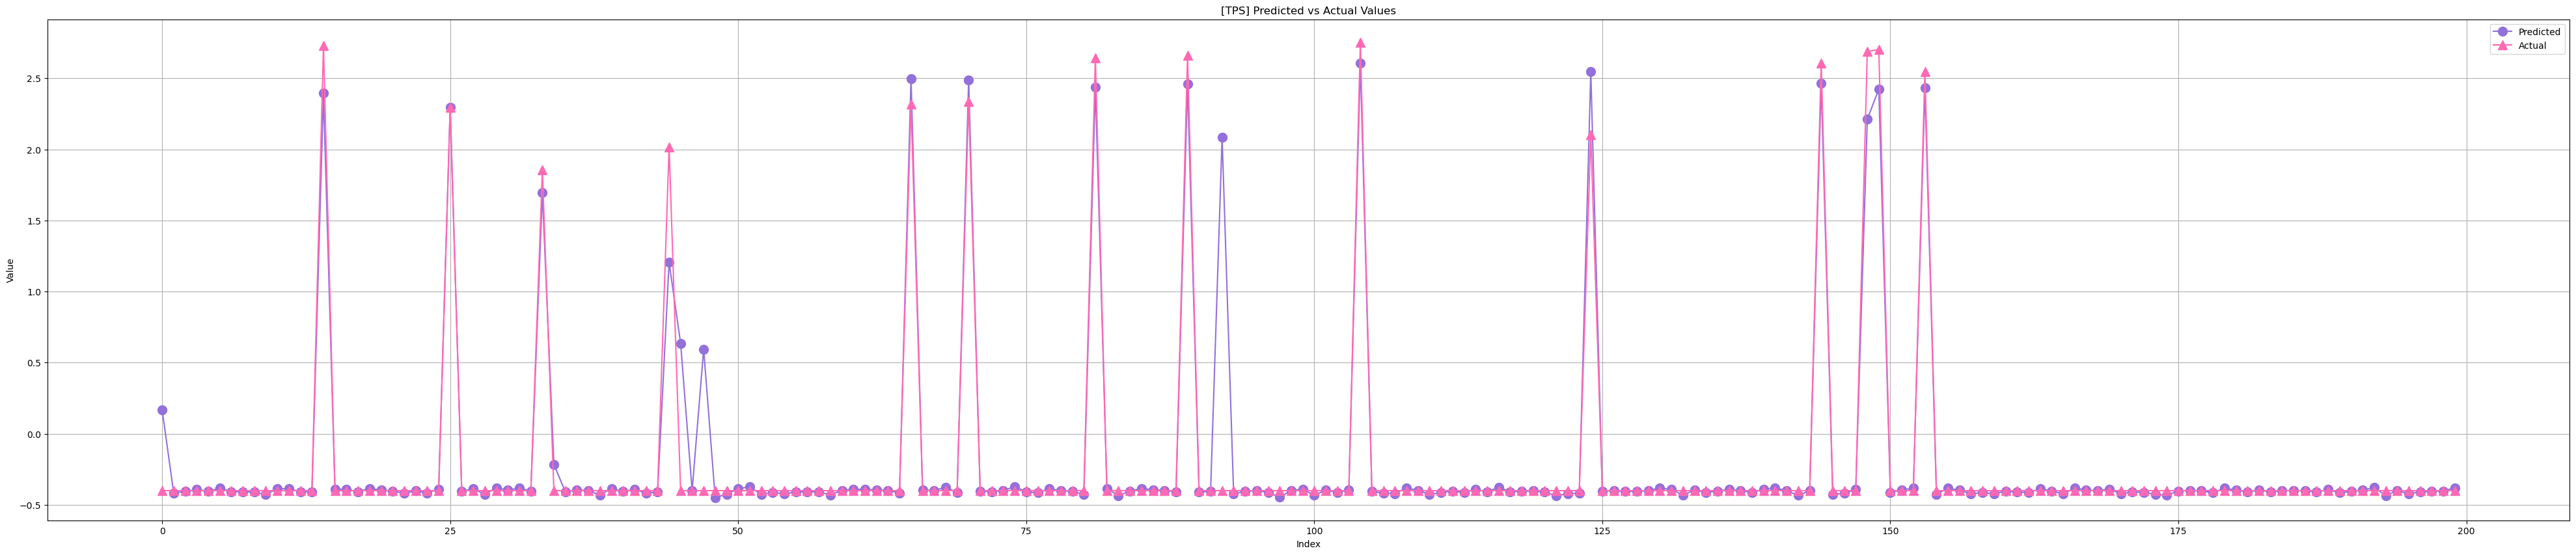

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 10))
plt.plot(predictions[:,0], label='Predicted', marker='o',markersize=10, color='mediumpurple')
plt.plot(scaled_y_test[:,0], label='Actual', marker='^',markersize=10, color='hotpink')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('[TPS] Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()


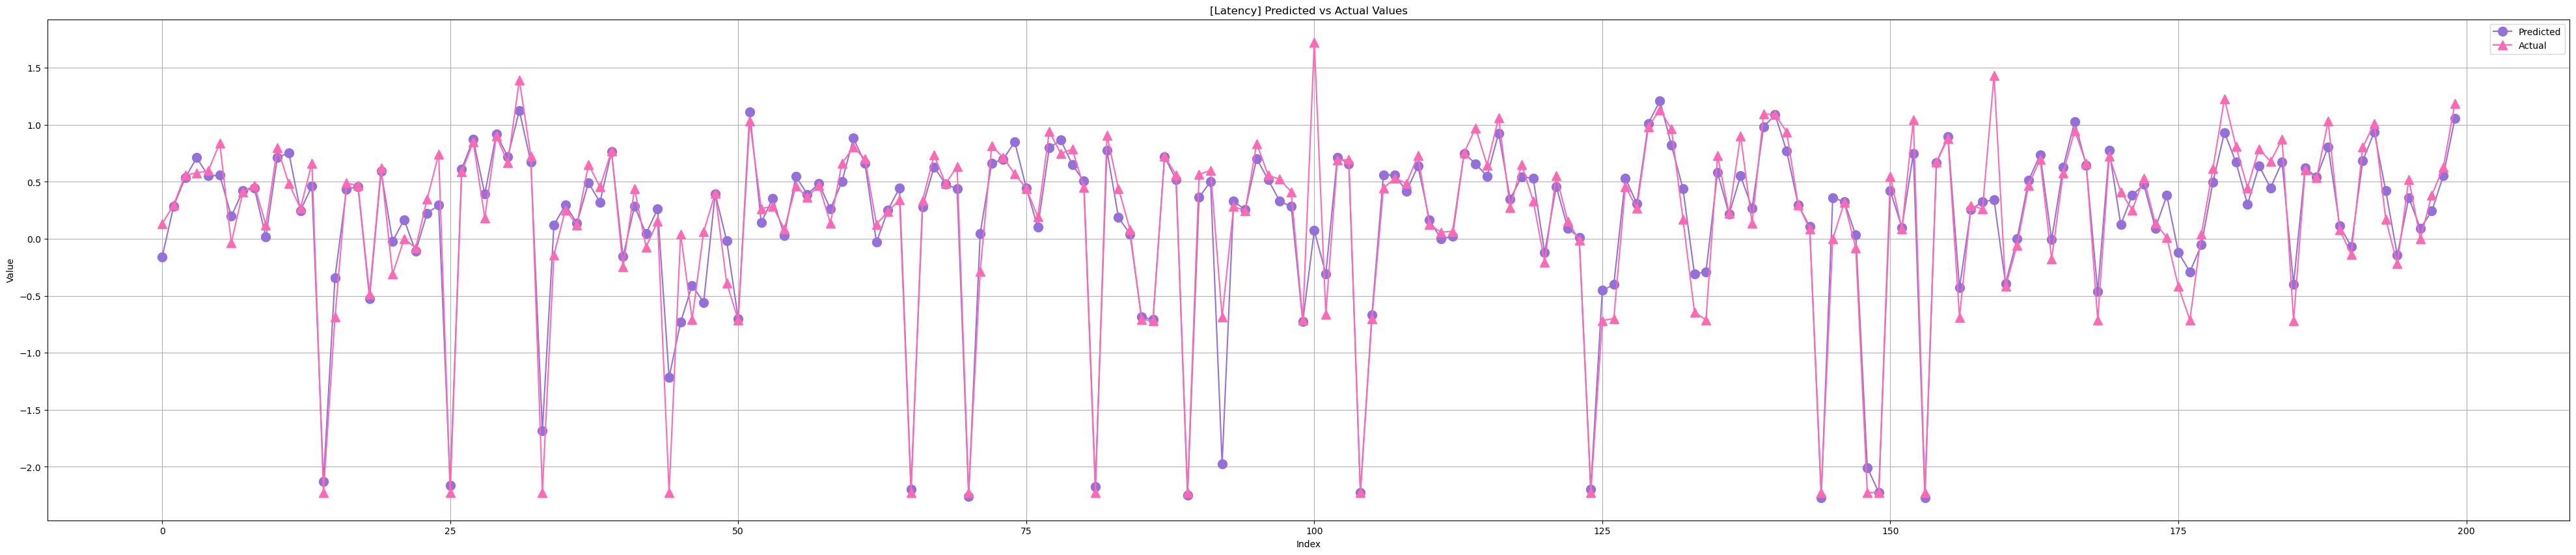

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 10))
plt.plot(predictions[:,1], label='Predicted', marker='o',markersize=10, color='mediumpurple')
plt.plot(scaled_y_test[:,1], label='Actual', marker='^',markersize=10, color='hotpink')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('[Latency] Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()


### LHS SAMPLING (make samples #4000)

In [11]:
import pandas as pd

knob_info = pd.read_csv('Knob_Information_MySQL_v5.7.csv')

knob_min = knob_info['raw_min']
knob_max = knob_info['raw_max']
knob_info

,name,type,unit,s_unit,raw_min,d_f_min,raw_max,d_f_max,raw_default,d_f_default,q_factor
0,automatic_sp_privileges,boolean,1,NaN,0,0,1.000000e+00,1,0.0,0.0,1
1,back_log,integer,1,NaN,1,0,6.000000e+04,60,4030.0,4.0,1000
2,binlog_cache_size,integer,1024,KB,4096,0,1.048576e+07,640,32768.0,2.0,16384
3,binlog_group_commit_sync_delay,integer,1,microsecond,0,0,1.000000e+06,200,0.0,0.0,5000
4,binlog_group_commit_sync_no_delay_count,integer,1,NaN,0,0,1.000000e+06,1000,0.0,0.0,1000
...,...,...,...,...,...,...,...,...,...,...,...
133,thread_cache_size,integer,1,NaN,0,0,1.638400e+04,64,-1.0,1.0,256
134,tmp_table_size,integer,1048576,MB,1024,0,1.073742e+09,256,16777216.0,4.0,4194304
135,transaction_alloc_block_size,integer,1024,KB,1024,0,1.310720e+05,32,8192.0,2.0,4096
136,transaction_prealloc_size,integer,1024,KB,1024,0,1.310720e+05,64,4096.0,2.0,2048


In [63]:
from pyDOE import *
from scipy.stats.distributions import uniform

def LH_Sampling(KNOB, KNOB_DETAILS, sample_num):
    maxvals = []
    minvals = []
    types = []
    names = []
    nfeats = len(KNOB)
    
    for knob in range (len(KNOB)):
        names.append(knob)
        knob_info = KNOB_DETAILS
        
        
        if knob_info['type'][knob] == 'boolean':
            maxvals.append(int(1))
            minvals.append(int(0))
        else:
            maxvals.append((knob_info['raw_max'][knob]).astype(int))
            minvals.append((knob_info['raw_min'][knob]).astype(int))
        types.append(knob_info['type'])
        
    
#np.random.seed(72)
    samples = lhs(nfeats, samples=sample_num, criterion='maximin')
    
    maxvals = np.array(maxvals)
    minvals = np.array(minvals)
    scales = maxvals - minvals
    
    for fidx in range(nfeats):
        samples[:, fidx] = uniform(loc=minvals[fidx], scale=scales[fidx]).ppf(samples[:, fidx])
        
    lhs_samples = []
    for sidx in range(sample_num):
        lhs_samples.append(dict())
        for fidx in range(nfeats):
            # lhs_samples[-1][names[fidx]] = int(round(samples[sidx][fidx]))
            lhs_samples[-1][names[fidx]] = int(round(samples[sidx][fidx]))
            # lhs_samples[-1][names[fidx]] = int(round(samples[fidx][sidx]))
            
    random.shuffle(lhs_samples)

    return lhs_samples

A_config_columns = A_config.columns.to_list()
A_config_columns_stripped = [column.strip() for column in A_config_columns]
mm_sample = LH_Sampling(A_config_columns_stripped, knob_info, 4000)


In [64]:
num_data = np.array(mm_sample)

sample_list = []
for ll in mm_sample:
    val = list(ll.values())
    # val = list(ll)   
    sample_list.append(val)
# sample_list = [ll]

In [65]:
samples = sample_list
samples = np.array(samples)

In [66]:
### Predict Metrics with New Samples ()= configs)

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

new_X = np.array(samples)
# new_X = np.round(new_X)
Z_scaler = MinMaxScaler().fit(new_X)
new_X_ = Z_scaler.transform(new_X)
# print(new_X_)

predictions_new = regressor.predict(new_X_) #scaling O


In [67]:
### new_metrics_re = 원래 metric + predic_metric
### predictions_new == predict_model.predict(new_sample)

predictions_new_df = pd.DataFrame(predictions_new) 


# inverse를 통해서 원래 데이터 형태로
inverse_new_pred_tps = Y_scaler_tps.inverse_transform(predictions_new[:, 0].reshape(-1, 1))
inverse_new_pred_lat = Y_scaler_latecy.inverse_transform(predictions_new[:, 1].reshape(-1, 1))

inverse_new_pred_sum = np.concatenate([inverse_new_pred_tps, inverse_new_pred_lat], axis=1)
inverse_new_pred_pd = pd.DataFrame(inverse_new_pred_sum)
inverse_new_pred_pd.rename(columns={0: "tps", 1:"latency"}, inplace=True)


new_metrics_re = pd.concat([metrics,inverse_new_pred_pd], axis=0)


new_metrics_re = new_metrics_re.reset_index()

In [68]:
new_metrics_re = new_metrics_re.drop(['index'], axis=1)
new_metrics_re

,tps,latency
0,2.255553,1.164892e+07
1,2.033328,1.044586e+07
2,1.977777,8.698988e+06
3,2.155554,1.001234e+07
4,2.199993,8.223487e+06
...,...,...
4995,75.146744,8.390534e+06
4996,14.334487,9.712273e+06
4997,9023.232422,-4.034859e+05
4998,72.120377,7.894732e+06


In [69]:
new_X_pd = pd.DataFrame(new_X)
# new_X_pd = round(new_X_pd).astype(int)
for i in range(len(new_X_pd.columns)):
    new_X_pd.rename(columns={new_X_pd.columns[i]: A_config.columns[i]}, inplace=True)   
    
new_Samples = pd.concat([A_config,new_X_pd] , axis=0)
new_Samples = new_Samples.reset_index()
new_Samples = new_Samples.drop(['index'], axis=1)

### AE Train set에 추가 (1000 + 4000) AUG == new_Samples

In [70]:
newnewwnew = pd.concat([new_Samples, new_metrics_re], axis = 1)

### AutoEncoder (raw data + new data)

In [72]:

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  TensorDataset, DataLoader


scaler_conf = MinMaxScaler()
scaler_tps = MinMaxScaler()
scaler_lat = MinMaxScaler()
# scaler_metrics = MinMaxScaler()

scaled_samples = scaler_conf.fit_transform(new_Samples)
# tps , latency 따로 scaling
scaled_new_metrics_re_tps = scaler_tps.fit_transform(new_metrics_re['tps'].values.reshape(-1, 1))
scaled_new_metrics_re_lat = scaler_lat.fit_transform(new_metrics_re['latency'].values.reshape(-1, 1))

scaled_new_Samples = np.concatenate([scaled_samples,scaled_new_metrics_re_tps,scaled_new_metrics_re_lat], axis = 1)

X_train, X_test = train_test_split(scaled_new_Samples, test_size=0.2, shuffle=True)

dataset_tr = TensorDataset(torch.tensor(X_train))
dataset_te = TensorDataset(torch.tensor(X_test))

trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=256, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_te, batch_size=256, shuffle=True)


In [73]:
import torch.nn as nn

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(140,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.BatchNorm1d(32),
        nn.ReLU(),
        nn.Linear(32,32),      
        nn.Sigmoid())
    
    self.decoder = nn.Sequential(
  
        nn.Linear(32,32),
        nn.BatchNorm1d(32),
        nn.ReLU(),
        nn.Linear(32,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Linear(128, 140), 
        nn.Sigmoid()
    )
  
  #인코더와 디코더 연산을 차례대로 수행하도록 설정 
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
# from torch import device
from torch import optim
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model =Autoencoder().to(device)
model = Autoencoder().to(device)
# model = Autoencoder()


critertion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
#lr=1e-4
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trainloss = []
validationloss = []
epoch_list = []

for epoch in range(50000):
  running_loss = 0
  model.train()
  
  for data in trainloader:
    inputs = data[0].float().to(device)
    optimizer.zero_grad()
    outputs = model(inputs) 
    loss = critertion(inputs, outputs)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(trainloader)
  trainloss.append(train_loss)
  # epoch_list.append(epoch)
  
  if epoch % 1000 == 0:
    total_val_loss = 0
    model.eval()
    with torch.no_grad():
      running_loss = 0
      
      for data in testloader:
        inputs = data[0].float().to(device)
        # optimizer.zero_grad()
        outputs = model(inputs) 
        loss = critertion(inputs, outputs)
        running_loss += loss.item()
        inputs_np = inputs.cpu().detach().numpy()
        outputs_np = outputs.cpu().detach().numpy()
      total_val_loss = running_loss / len(testloader)
      validationloss.append(total_val_loss)
        
    print('[%d] tr_loss : %.3f | val_loss : %.3f' %(epoch +1, train_loss, total_val_loss))
    # print('MSE_Loss :', critertion(inputs, outputs) )

### Optimization in latent space (TabNet)
- Prediction

In [75]:

import torch
import pandas as pd
import numpy as np

ex_scaled_new_Samples = torch.Tensor(scaled_new_Samples).to(device)

with torch.no_grad():
    encoded_vector_BO = model.encoder(ex_scaled_new_Samples)
    print("BO'S Encoded Latent Vector:", encoded_vector_BO)

BO'S Encoded Latent Vector: tensor([[0.5155, 0.4564, 0.5415,  ..., 0.4322, 0.5162, 0.5621],
        [0.4712, 0.4558, 0.4818,  ..., 0.3965, 0.5415, 0.5812],
        [0.5126, 0.4501, 0.5258,  ..., 0.4369, 0.4900, 0.5135],
        ...,
        [0.5548, 0.4279, 0.5614,  ..., 0.5026, 0.4353, 0.5818],
        [0.5079, 0.4979, 0.5078,  ..., 0.4511, 0.4544, 0.5630],
        [0.4275, 0.4770, 0.4997,  ..., 0.4390, 0.5004, 0.4740]],
       device='cuda:0')


In [51]:
test = torch.Tensor(X_test).to(device)

with torch.no_grad():
    latent_space = model.encoder(test)
    print("BO'S Encoded Latent Vector:", latent_space)

BO'S Encoded Latent Vector: tensor([[0.5436, 0.4176, 0.2196,  ..., 0.5346, 0.4650, 0.4987],
        [0.4837, 0.4801, 0.2183,  ..., 0.4543, 0.4386, 0.4828],
        [0.4327, 0.4762, 0.1969,  ..., 0.4997, 0.4817, 0.4506],
        ...,
        [0.5290, 0.4621, 0.2914,  ..., 0.5108, 0.5462, 0.5205],
        [0.5348, 0.4357, 0.2257,  ..., 0.5630, 0.4704, 0.4996],
        [0.5362, 0.4814, 0.2772,  ..., 0.5382, 0.4766, 0.4861]],
       device='cuda:0')


In [76]:
label_total = torch.tensor(X_test)
recon_total = model(torch.tensor(X_test).to("cuda").float())

label_total_np = label_total.detach().cpu().numpy()
recon_total_np = recon_total.detach().cpu().numpy()

all_concat = np.concatenate([label_total_np,recon_total_np] )
all_concat.shape

(2000, 140)

In [25]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler,StandardScaler


n_components = 2

# scaler = MinMaxScaler()
# input_array = scaler.fit_transform(inputs_np)


tsne_model = TSNE(n_components=n_components)

r = tsne_model.fit_transform(all_concat)

# print(tsne_model.fit_transform(input_array))

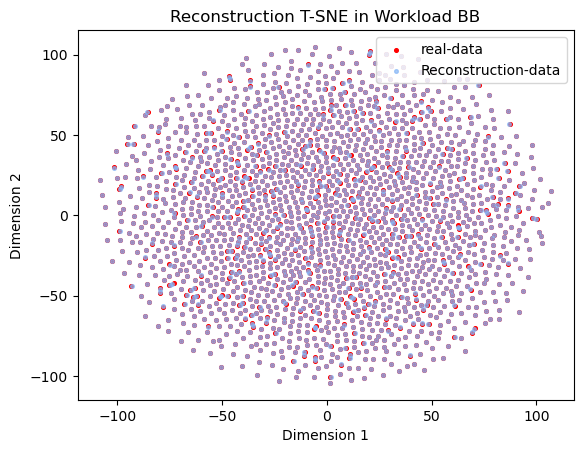

<Figure size 1000x1000 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt

# t-SNE 결과 시각화
plt.scatter(r[:2000, 0], r[:2000, 1], s=7, color='red',  label='real-data')
plt.scatter(r[2000:, 0], r[2000:, 1], s=7, alpha=0.7,color='#86B6F6', label='Reconstruction-data')

plt.title('Reconstruction T-SNE in Workload BB')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


plt.legend(loc='upper right')
plt.figure(figsize=(10,10))
plt.show()





In [39]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from sklearn.datasets import load_digit
import torch


n_components = 2

tsne_model = TSNE(n_components=n_components)

# r2 = tsne_model.fit_transform(torch.tensor(synthetic_data).cpu())
#scaler = MinMaxScaler()
#output_array = scaler.fit_transform(outputs_np)
r2 = tsne_model.fit_transform(recon_total_np)

 
# print(tsne_model.fit_transform(input_array))

In [54]:

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from sklearn.datasets import load_digit
import torch


n_components = 2

tsne_model = TSNE(n_components=n_components)

# r2 = tsne_model.fit_transform(torch.tensor(synthetic_data).cpu())
#scaler = MinMaxScaler()
#output_array = scaler.fit_transform(outputs_np)
r3 = tsne_model.fit_transform(label_total)

 
# print(tsne_model.fit_transform(input_array))


In [58]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from sklearn.datasets import load_digit
import torch


n_components = 2
encoded_vector_BO_cpu = latent_space.cpu()

# Convert the tensor to a NumPy array
np_encoded_vector_BO = encoded_vector_BO_cpu.detach().numpy()
tsne_model = TSNE(n_components=n_components)

# r2 = tsne_model.fit_transform(torch.tensor(synthetic_data).cpu())
#scaler = MinMaxScaler()
#output_array = scaler.fit_transform(outputs_np)
r4 = tsne_model.fit_transform(np_encoded_vector_BO)

# encoded_vector_BO

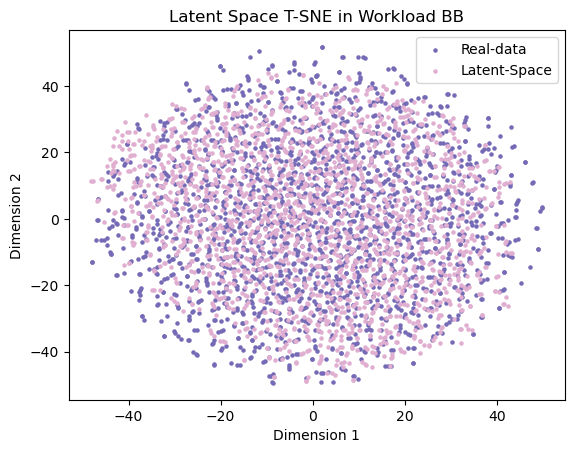

<Figure size 1000x1000 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt

# t-SNE 결과 시각화
plt.scatter(r3[:, 0], r3[:, 1], s=5, color='#756AB6',  label='Real-data')
plt.scatter(r4[:, 0], r4[:, 1], s=5,  color='#E0AED0', label='Latent-Space')

plt.title('Latent Space T-SNE in Workload BB')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


plt.legend(loc='upper right')
plt.figure(figsize=(10,10))
plt.show()


In [ ]:
### TabNet
### X = encoded_vector_BO (Scaling O) , Y = metrics (Scaling X)

from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler


X_latent = np.array(encoded_vector_BO.cpu().numpy())
Y_latent = np.array(new_metrics_re)

lt_X_train, lt_X_test, lt_y_train, lt_y_test = train_test_split(X_latent,Y_latent,test_size=0.2, shuffle=True)


y_train_tps = lt_y_train[:,0][:, np.newaxis]
y_train_latecy = lt_y_train[:,1][:, np.newaxis]
y_test_tps = lt_y_test[:,0][:, np.newaxis]
y_test_latecy = lt_y_test[:,1][:, np.newaxis]


Y_scaler_tps  = StandardScaler().fit(y_train_tps)
Y_scaler_latecy = StandardScaler().fit(y_train_latecy)


scaled_lt_y_train_tps = Y_scaler_tps.transform(y_train_tps)
scaled_lt_y_train_latency = Y_scaler_latecy.transform(y_train_latecy)


scaled_lt_y_test_tps = Y_scaler_tps.transform(y_test_tps)
scaled_lt_y_test_latency = Y_scaler_latecy.transform(y_test_latecy)


scaled_lt_y_train = np.concatenate([scaled_lt_y_train_tps, scaled_lt_y_train_latency], axis = 1)
# scaled_lt_y_train = scaled_lt_y_train_latency

# scaled_lt_y_test = scaled_lt_y_test_latency
scaled_lt_y_test = np.concatenate([scaled_lt_y_test_tps, scaled_lt_y_test_latency], axis = 1)


# Y_scaler_tps = MinMaxScaler().fit(lt_y_train)
# Y_scaler_lat = MinMaxScaler().fit(lt_y_train)

# scaled_lt_y_train = Y_scaler.transform(lt_y_train)
# scaled_lt_y_test = Y_scaler.transform(lt_y_test)

# Tabnet 모델 생성
lt_regressor = TabNetRegressor(output_dim=2,verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) 
    
# 모델 학습
lt_regressor.fit(X_train=lt_X_train, y_train=scaled_lt_y_train,
              eval_set=[(lt_X_test, scaled_lt_y_test)],
              patience=1000, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['rmse'])

# 테스트 데이터로 예측
lt_predictions = lt_regressor.predict(lt_X_test)

# 성능 평가
print('BEST VALID SCORE : ', lt_regressor.best_cost)
print('R2 SCORE : ' , r2_score(scaled_lt_y_test, lt_predictions))





In [87]:
latent_pd = pd.DataFrame(encoded_vector_BO.cpu().numpy())
latent_pd_T = latent_pd.T
# latent_pd_T.index

In [103]:
### BO 코드
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics, regressor,config_info_path=None):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        self.config_info_path = config_info_path
        # self.min_max_same_knobs = []
        self.regressor = regressor
        self._get_config_info()
        self._init_pbounds()
    
    def _get_config_info(self):
        if self.config_info_path is None:
            self.config_info = pd.read_csv('/home/sein/mk_config/Knob_Information_MySQL_v5.7.csv', index_col=0)
        else:
            self.config_info = pd.read_csv(self.config_info_path, index_col=0)
        
        # if self.top_z_knob is not None:
        #     self.config_info = self.config_info.loc[self.top_z_knob]
        #     self.configs = self.configs[self.top_z_knob]
            

#     def _get_history(self):
#         self.history_configs = self.smac.runhistory.get_configs()
    
    def _init_pbounds(self):
        self.pbounds = {}
        
        for v in latent_pd_T.index:
            self.pbounds[str(v)] = (0, 1)
            
    
   
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        # scaled_X = self.X_scaler.transform([x])
        x = x.reshape(1, -1)

        res = self.regressor.predict(x)
        res = res[:,0] / res[:,1]

        
        return res.squeeze()
        # return res
    
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, random_state=2)

        self.acquisition_function = UtilityFunction(kind="ei", kappa=0.0, xi=0.001)
        
        self.optimizer.maximize(n_iter=self.iteration, init_points=300, acquisition_function=self.acquisition_function)
    

In [53]:
encoded_vector_BO.shape

torch.Size([5000, 32])

### Bayesian Optimization

In [ ]:
tuner1 = BO(iteration=500, 
           configs=encoded_vector_BO.cpu().numpy(),
           metrics=new_metrics_re,
           regressor=lt_regressor
                      )
tuner1.tune()
# tuner1.plot_history()

In [34]:
# best case 3
ex_data = [1.0, 1.0, 0.418, 0.8316, 0.2844, 0.3489, 0.505, 0.8317, 1.0, 0.9584, 0.0, 0.9986, 0.5278, 0.07095,
           1.0, 0.8964, 1.0, 0.5902, 0.0, 0.9988, 1.0, 1.0, 0.3387, 0.0005476, 0.9542, 0.0, 0.7432, 1.0, 0.8241,
           0.7042, 0.7255, 0.09468]

In [64]:
len(ex_data)

32

In [ ]:
# Decoding to real dimension

ex_data = torch.tensor(ex_data).unsqueeze(0)
ex_data = ex_data.to('cuda:0')  # ex_data를 GPU로 이동

with torch.no_grad():
    model.eval()
    decode_value = model.decoder(ex_data)
    print("Decoded Value:", decode_value)

In [ ]:
converted_values = [float(value) for value in decode_value[0]]

df_converted_values = pd.DataFrame(converted_values)

real_bo_config = df_converted_values[:138] 
real_v = np.array(real_bo_config)

rescaled_bo_config = scaler_conf.inverse_transform(real_v.reshape(1,-1))



In [94]:
real_bo_config

,0
0,0.998686731
1,0.898464203
2,0.999251783
3,0.501672149
4,0.919194818
...,...
133,0.978602171
134,0.972092509
135,0.007583587
136,0.919451952


In [95]:
pd.options.display.float_format = '{:.9f}'.format #지수함수 없이 출력하는 option

rescaled_actual_pd = pd.DataFrame(rescaled_bo_config)
rescaled_actual_pd

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0.998686731,53907.953708649,10477917.439697266,501672.148704529,919194.817543030,1.000000000,2336700.564025879,386573952.000000000,6.948403358,29.313912392,...,885.927344292,999947.309494019,502.281004377,601.814560033,28.493879437,16033.417968750,1043776412.577270508,2010.230317593,120596.887451172,0.000000000


In [96]:
for i in range (len(A_config.columns)):
    print('{} = {}'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))

automatic_sp_privileges  = 1
back_log  = 53908
binlog_cache_size  = 10477917
binlog_group_commit_sync_delay  = 501672
binlog_group_commit_sync_no_delay_count  = 919195
binlog_rows_query_log_events  = 1
binlog_stmt_cache_size  = 2336701
bulk_insert_buffer_size  = 386573952
default_week_format  = 7
div_precision_increment  = 29
end_markers_in_json  = 0
eq_range_index_dive_limit  = 9997
expire_logs_days  = 0
explicit_defaults_for_timestamp  = 0
flush_time  = 3
ft_min_word_len  = 16
ft_query_expansion_limit  = 1000
general_log  = 0
group_concat_max_len  = 4096
innodb_adaptive_hash_index_parts  = 504
innodb_adaptive_max_sleep_delay  = 999999
innodb_autoextend_increment  = 929
innodb_buffer_pool_size  = 1074859095
innodb_change_buffer_max_size  = 27
innodb_cmp_per_index_enabled  = 0
innodb_commit_concurrency  = 918
innodb_compression_failure_threshold_pct  = 30
innodb_compression_level  = 0
innodb_compression_pad_pct_max  = 75
innodb_concurrency_tickets  = 5174
innodb_deadlock_detect  = 0
in